In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/Users/lenovo1/Downloads/lab-imbalanced-data_/customer_churn.csv')

In [4]:
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = df['Churn']

In [14]:
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

In [15]:
X.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64

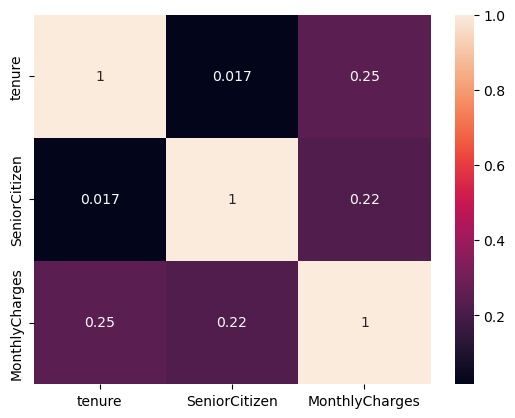

In [17]:
y = df['Churn']

correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

X_train.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,24,0,49.30
6397,54,1,65.25
6043,3,0,40.15
5309,61,0,20.25
3000,12,0,84.45


In [19]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,24,0,49.30
6397,54,1,65.25
6043,3,0,40.15
5309,61,0,20.25
3000,12,0,84.45


In [20]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [22]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 
y_train.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [23]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [24]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

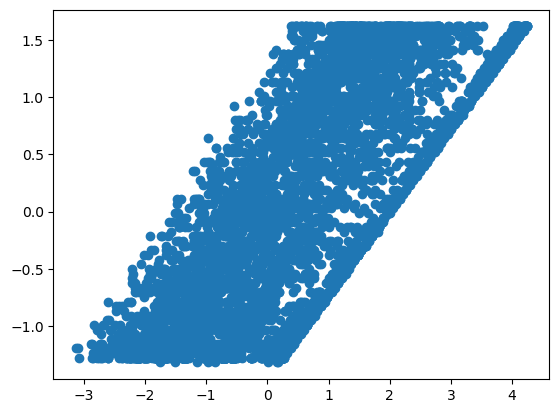

In [38]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)
plt.scatter(logits,X_train_scaled['tenure'])

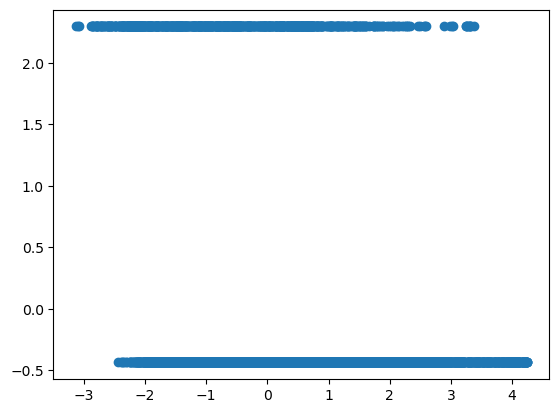

In [39]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

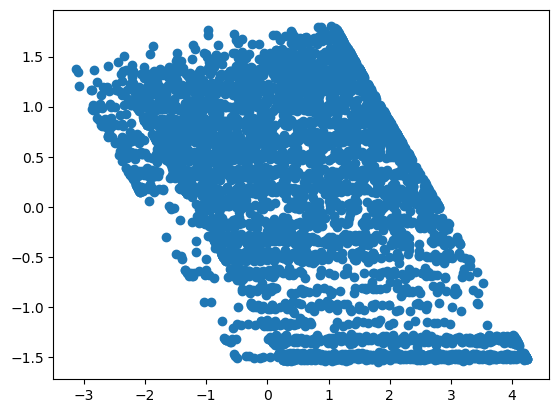

In [40]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

<Axes: >

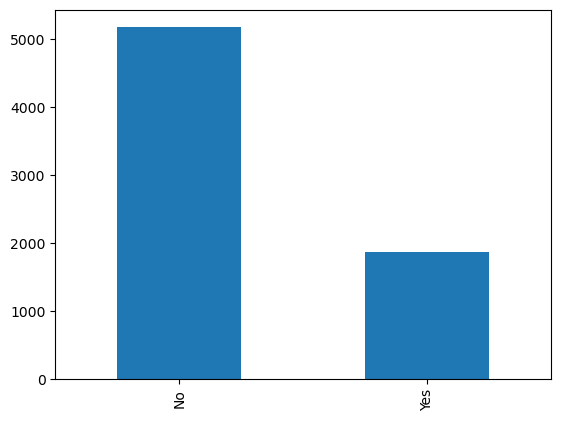

In [29]:
count_classes = df['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [30]:
5000/(5000+1900)

0.7246376811594203

In [31]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ", recall_score(y_test, pred, average="binary", pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)
X_train_SMOTE.shape

(7752, 3)

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ", recall_score(y_test, pred, average="binary", pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [36]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])